# 2021 W36：What do Americans think about abortion?

## Import packages

In [163]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime, timedelta
from pathlib import Path
%matplotlib inline

## Read data

### Target dataset

In [32]:
df = pd.read_excel('../data/Abortion Support.xlsx', index_col=0)

In [33]:
df.head(20)

,Legal under any %,Legal only under certain %,Illegal in all %,No opinion %
Poll Date,,,,
2021 May 3-18,0.32,0.48,0.19,0.02
2020 May 1-13,0.29,0.50,0.20,0.02
2019 May 1-12,0.25,0.53,0.21,0.02
2018 May 1-10,0.29,0.50,0.18,0.02
2017 May 3-7,0.29,0.50,0.18,0.03
2016 May 4-8,0.29,0.50,0.19,0.02
2015 May 6-10,0.29,0.51,0.19,0.01
2014 May 8-11,0.28,0.50,0.21,0.02
2013 May 2-7,0.26,0.52,0.20,0.02


## EDA

In [34]:
# poll date
df.index 

Index(['2021 May 3-18', '2020 May 1-13', '2019 May 1-12', '2018 May 1-10',
       '2017 May 3-7', '2016 May 4-8', '2015 May 6-10', '2014 May 8-11',
       '2013 May 2-7', '2012 Dec 27-30', '2012 May 3-6', '2011 Jul 15-17',
       '2011 Jun 9-12', '2011 May 5-8', '2010 May 3-6', '2009 Jul 17-19',
       '2009 May 7-10', '2008 May 8-11', '2007 May 10-13', '2006 May 8-11',
       '2005 Nov 11-13', '2005 Jun 24-26', '2005 May 2-5', '2005 Mar 21-23',
       '2004 May 2-4', '2003 Oct 24-26', '2003 May 5-7', '2003 Jan 10-12',
       '2002 May 6-9', '2002 Mar 22-24', '2002 Feb 8-10', '2001 Aug 10-12',
       '2001 May 10-14', '2001 Mar 26-28', '2000 Mar 30-Apr 2',
       '2000 Jan 13-16', '1999 Apr 30-May 2', '1998 Jan 16-18', '1997 Nov 6-9',
       '1997 Aug 12-13', '1996 Sep 20-22 ^', '1996 Jul 25-28',
       '1995 Sep 22-24', '1995 Feb 24-26', '1994 Sep 6-7', '1994 Mar 28-30',
       '1993 Mar 12-14', '1992 Jul 23-24 ^', '1992 Jan 16-19', '1991 Sep 5-8',
       '1991 May 30-Jun 2', '1990 Ap

- Not unique in years.
- And frequency varies from year to year.

In [35]:
# Sum of the lines
df.sum(axis=1).values

array([1.01, 1.01, 1.01, 0.99, 1.  , 1.  , 1.  , 1.01, 1.  , 1.01, 1.  ,
       1.  , 1.  , 1.01, 1.  , 1.  , 1.  , 1.01, 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

- Some lines do not sum to 100%.

## Preprocessing

In [37]:
# Parse poll date in datetime

# Get start date of poll
poll_start = df.index.map(lambda x: x[:x.find('-')])

# Parse datetime
dt_poll_start = pd.to_datetime(poll_start, format='%Y %b %d')

# Set index
df.index = dt_poll_start

df

,Legal under any %,Legal only under certain %,Illegal in all %,No opinion %
Poll Date,,,,
2021-05-03,0.32,0.48,0.19,0.02
2020-05-01,0.29,0.50,0.20,0.02
2019-05-01,0.25,0.53,0.21,0.02
2018-05-01,0.29,0.50,0.18,0.02
2017-05-03,0.29,0.50,0.18,0.03
...,...,...,...,...
1981-05-08,0.23,0.52,0.21,0.04
1980-07-11,0.25,0.53,0.18,0.04
1979-02-23,0.22,0.54,0.19,0.05


In [75]:
# remove no opinions
df = df.drop('No opinion %', axis=1)
df

,Legal under any %,Legal only under certain %,Illegal in all %
Poll Date,,,
2021-05-03,0.32,0.48,0.19
2020-05-01,0.29,0.50,0.20
2019-05-01,0.25,0.53,0.21
2018-05-01,0.29,0.50,0.18
2017-05-03,0.29,0.50,0.18
...,...,...,...
1981-05-08,0.23,0.52,0.21
1980-07-11,0.25,0.53,0.18
1979-02-23,0.22,0.54,0.19


## Visualization

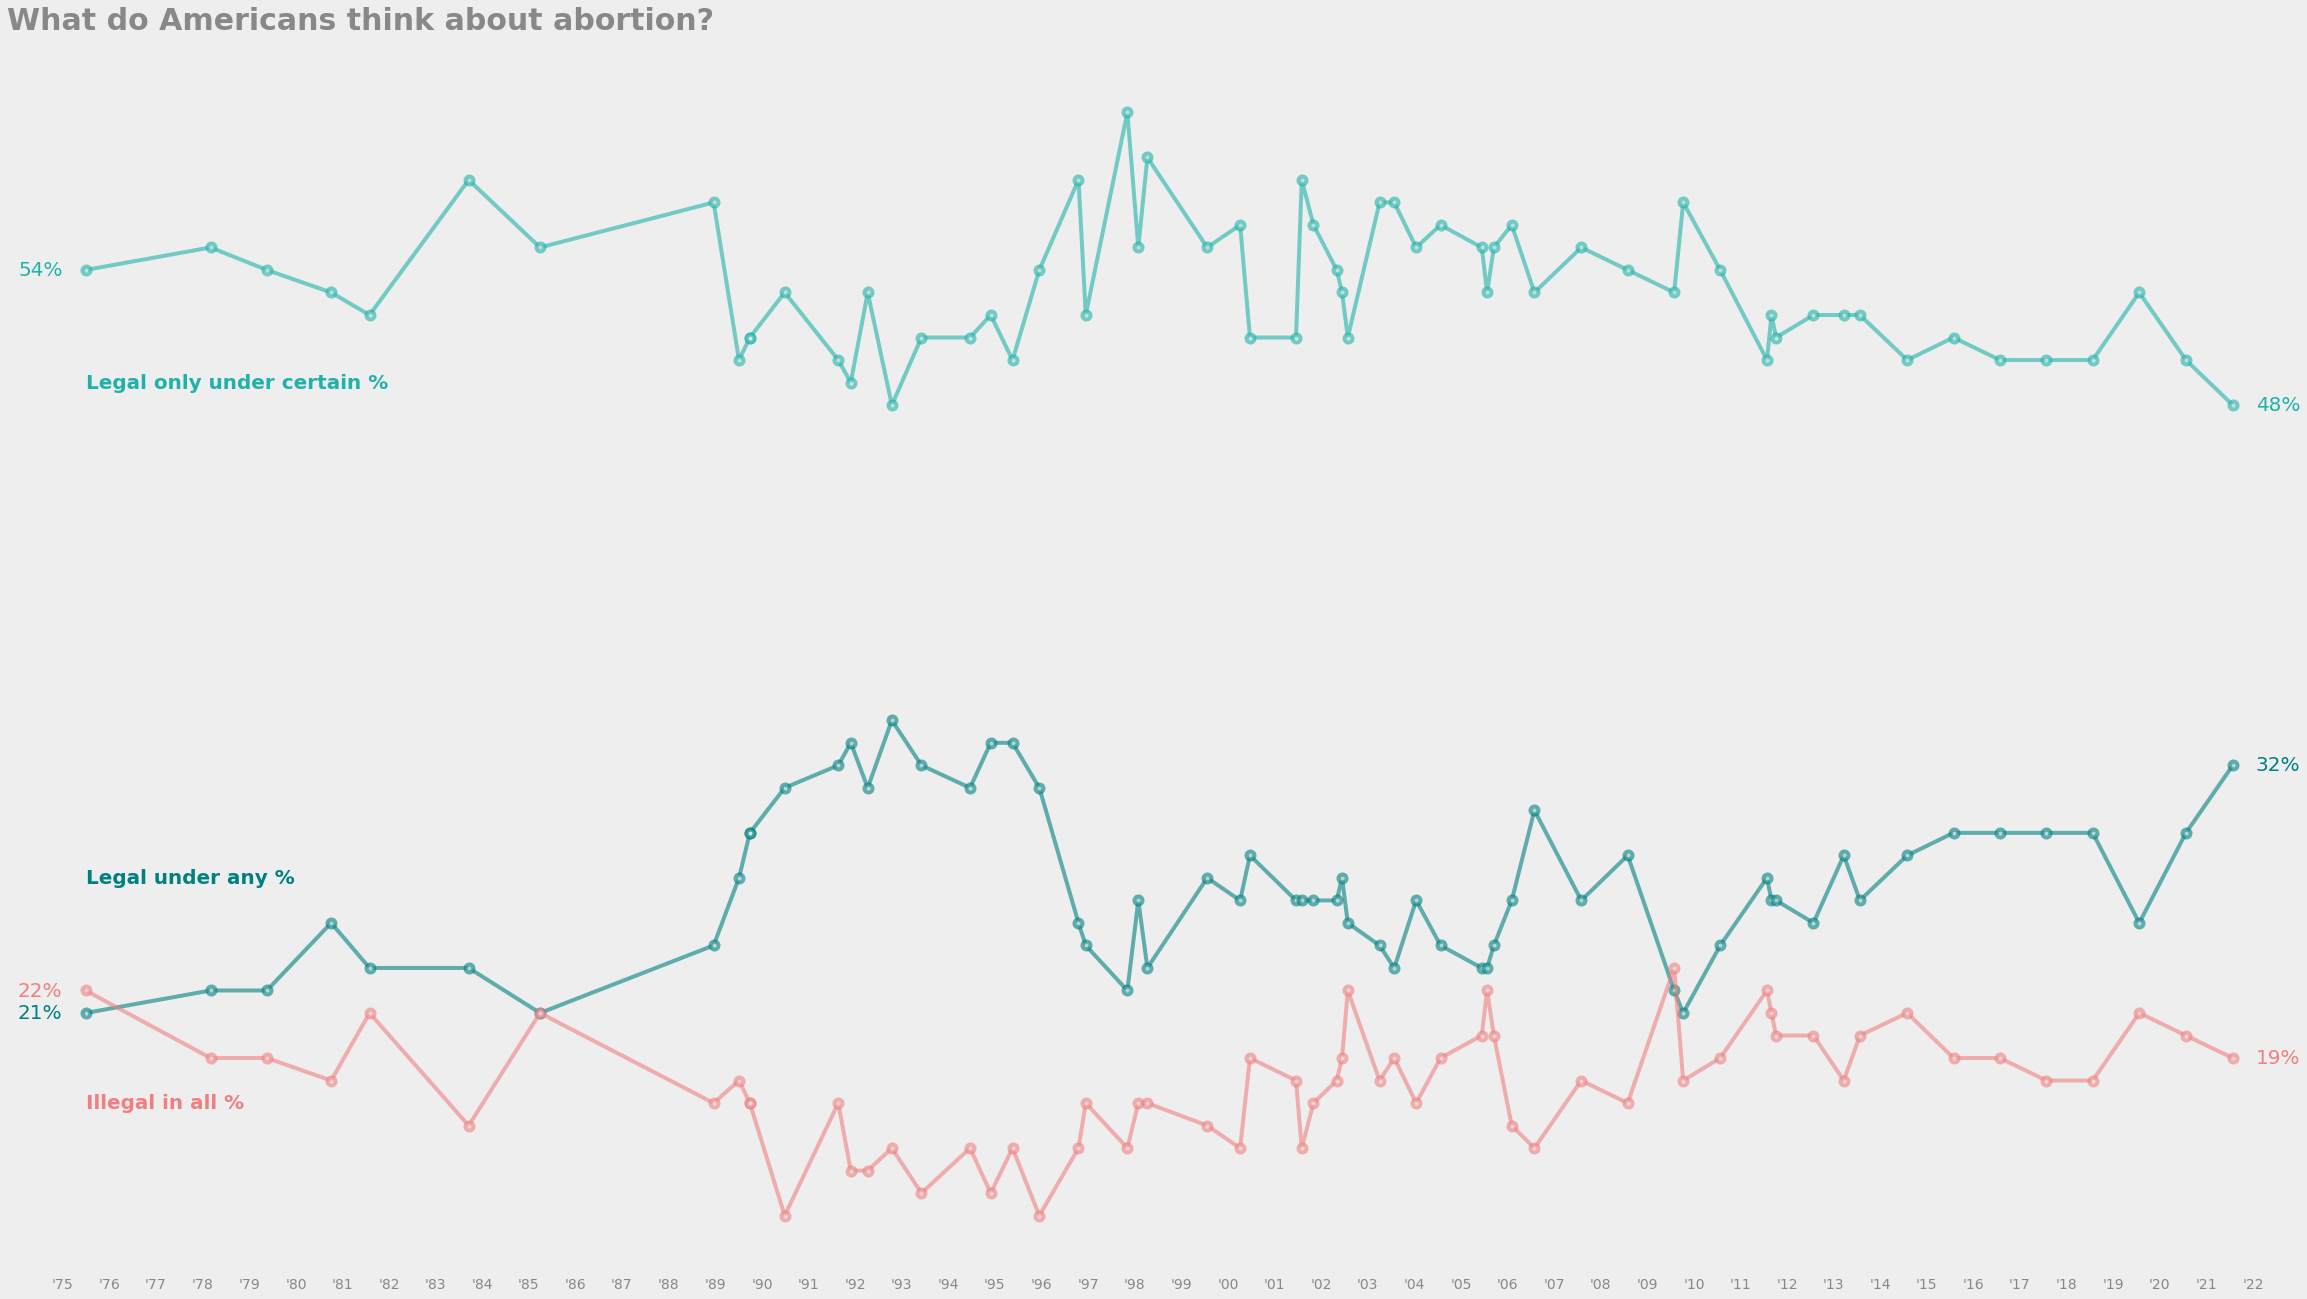

In [173]:
# Create Layout by using gridspec
facecolor='#eeeeee'
textcolor='#888888'
valcolors=['teal', 'lightseagreen', 'lightcoral']
fig = plt.figure(facecolor=facecolor, figsize=(32, 18), tight_layout=True)
ax = fig.add_subplot(1,1,1, facecolor=facecolor)

# Add title
fig.suptitle('What do Americans think about abortion?',
             x=0,
             y=1,
             ha='left',
             va='top',
             fontsize=30,
             fontweight='bold',
             color=textcolor)

df.plot(ax=ax, 
        marker='o',
        markersize=8,
        mfc=facecolor,
        mew=4,
        linewidth=4,
        alpha=0.6,
        legend=False,
        color=valcolors)



ax.text(df.index[-1], 
        df.iloc[-1][0]+0.06, 
        df.columns[0],
        fontweight='bold',
        fontsize=20,
        color=valcolors[0],
        ha='left',
        va='center')

ax.text(df.index[-1], 
        df.iloc[-1][1]-0.05, 
        df.columns[1],
        fontweight='bold',
        fontsize=20,
        color=valcolors[1],
        ha='left',
        va='center')


ax.text(df.index[-1], 
        df.iloc[-1][2]-0.05, 
        df.columns[2],
        fontweight='bold',
        fontsize=20,
        color=valcolors[2],
        ha='left',
        va='center')

for val, color in zip(df.iloc[[0, -1]].iteritems(), valcolors):
    ax.text(val[1].index[0]+timedelta(days=180), 
            val[1][0], 
            f'{val[1][0]:.0%}',
            fontsize=20,
            color=color,
            ha='left',
            va='center')    
    ax.text(val[1].index[1]-timedelta(days=180), 
            val[1][1], 
            f'{val[1][1]:.0%}',
            fontsize=20,
            color=color,
            ha='right',
            va='center')    

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("'%y"))
ax.set_xlim(pd.Timestamp('1975-1-1'), pd.Timestamp('2022-05-01'))
ax.spines[:].set_visible(False)
ax.set(yticks=[], xlabel='')
ax.tick_params('x', color=facecolor, rotation=0, labelsize=14, labelcolor=textcolor)

save_dir = Path('../fig')
save_name = list(Path.cwd().glob('*.ipynb'))[0].stem
fig.savefig(save_dir / f'{save_name}.png', transparent=False, bbox_inches='tight')